In [1]:
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import ipympl
from mpl_toolkits.mplot3d import Axes3D
import squarify
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Force widgets to be shown on notebook (may need permissions from the user)
%matplotlib widget
#%matplotlib inline

In [2]:
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [3]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

In [4]:
reviews_df = pd.read_excel(r'C:\Users\user\Exports\MergedData.xlsx' , sheet_name='Reviews')
reviews_df

,Local ID,Extraction Date,Global Rating,Position On Ranking,Sites On Ranking,Total Reviews,User Name,User Location,User Contributions,Trip Type,Review Written,Review Visited,Review Rating,Review Language,Review Full Text,User ISO,ISO
0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi...",US,ES
1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...,IE,ES
2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...,ES,ES
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,NaN,ES
4,MAG001,2021-08-20 08:24:40.168,4.5,1,1186,163828,paul n@pauln3630,"Towaco, NJ",21,NaN,2021-08-15,2021-08-01,3,en,The sheer height of this church makes it a onc...,US,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67732,MAG100,2021-08-21 16:27:11.518,4.5,11,677,5179,Diego B@diegobX5676JH,"Buenos Aires, Argentina",86,Couples,2019-04-23,2019-04-01,5,en,Florence is my favorite Italian city so far.Th...,AR,IT
67733,MAG100,2021-08-21 16:27:11.614,4.5,11,677,5179,rosa.ji@rosaji,NaN,14,Friends,2019-04-23,2019-03-01,5,en,"I don't even want to review this city, because...",NaN,IT
67734,MAG100,2021-08-21 16:27:11.705,4.5,11,677,5179,Margrieta K@Margrieta2013,"Elburg, The Netherlands",403,Business,2019-03-24,2019-03-01,5,en,The old centre of Florence is realy worth the ...,NL,IT
67735,MAG100,2021-08-21 16:27:12.086,4.5,11,677,5179,KateJourney@KateJourney,"Exeter, Canada",185,NaN,2019-02-12,2018-11-01,4,en,It is an ironic twist to see all of the modern...,CA,IT


In [5]:
#Search for the most recent date in the Review Visits column
from datetime import datetime
dateMax = reviews_df['Review Visited'].max()

Let's perform a data aggregation and transformation operation on the DataFrame named reviews_df, which will result in a new DataFrame 'X'. This in turn will contain information about each user, including the recency of the reviews, the frequency (number of reviews), and the average review rating. In this way, we will pre-process the data to summarize the information in a more useful or convenient way for later analysis.

In [6]:
X = reviews_df.groupby(['User Name']).agg(Recency=('Review Visited', lambda date : (dateMax - date.max()).days),
                                   Frequency=('Local ID', 'count'),
                                   Monetary=('Review Rating', 'mean')).fillna(0)

In [7]:
X.head(10)

,Recency,Frequency,Monetary
User Name,,,
#1 Best@Number1Best,1096,1,5.0
#Travelendlessbeauty@travelendlessbeauty,792,1,5.0
#moving mountains@peaceat28,670,2,4.5
#taxi de Barcelona #taxi#aeropuer@cavataxi,365,1,5.0
'Tis Me@DrSuess2015,792,1,5.0
--Isma-1010@--Isma-1010,943,1,5.0
-ME-@melizarov,670,1,4.0
-Sheila G@924sheilag,943,1,5.0
-medvem-@-medvem-,731,3,5.0


This summary information gives you an overview of users' review patterns, including the frequency, recency, and average ratings of their reviews. This can be useful for identifying the most active users, analyzing ranking trends, or segmenting users based on their review behavior.

In [8]:
# Determinining RFM cutting points based on the quartiles (default for pandas "describe")
cols = ['Recency','Frequency','Monetary']
table = X[cols].describe()
table

,Recency,Frequency,Monetary
count,55924.000000,55924.000000,55924.000000
mean,740.591446,1.211233,4.567759
std,181.856849,0.584931,0.810144
min,0.000000,1.000000,1.000000
25%,670.000000,1.000000,4.000000
50%,762.000000,1.000000,5.000000
75%,853.000000,1.000000,5.000000
max,1704.000000,11.000000,5.000000


* The Recency column shows the recency of reviews for each user, calculated as the difference in days between the maximum global review date (dateMax) and the most recent review date for the user. Higher values indicate that the user has made more recent reviews. The average of the values in the column is approximately 740.59. This indicates that, on average, reviews were made approximately 740.59 days ago.
* The Frequency column shows the number of reviews each user has written. The statistics are similar to the 'Recency' column, but here we are dealing with reviews frequency rather than recency. The average is about 1.21, which means that on average, each user has written about 1.21 reviews.
* The Monetary column represents the average of the ratings given by the user in their reviews. The average is calculated from individual review ratings. According to preliminary analysis, the average is about 4.57, which means that the average rating given by users in their reviews is about 4.57.

In [9]:
# Calculate RMF scores

# Function
def RFMScore(x, col):
    if x <= col.quantile(0.25):
        return '1'
    elif x <= col.quantile(0.5):
        return '2'
    elif x <= col.quantile(0.75):
        return '3'
    else:
        return '4'

# Process
X['RScore'] = pd.cut(X['Recency'], bins=[0, 365, 730, 1095, float('inf')], labels=[1, 2, 3, 4])
X['FScore'] = pd.cut(X['Frequency'], bins=[0, 1, 2, 3, float('inf')], labels=[1, 2, 3, 4])
X['MScore'] = pd.cut(X['Monetary'], bins=[0, 2, 3, 4, float('inf')], labels=[1, 2, 3, 4])

In [10]:
X.head(5)

,Recency,Frequency,Monetary,RScore,FScore,MScore
User Name,,,,,,
#1 Best@Number1Best,1096,1,5.0,4,1,4
#Travelendlessbeauty@travelendlessbeauty,792,1,5.0,3,1,4
#moving mountains@peaceat28,670,2,4.5,2,2,4
#taxi de Barcelona #taxi#aeropuer@cavataxi,365,1,5.0,1,1,4
'Tis Me@DrSuess2015,792,1,5.0,3,1,4


The purpose of the code above is to calculate RFM (Recency, Frequency, Monetary) scores for each entry in DataFrame X, which are used in customer segmentation analysis or marketing analysis to classify customers based on their behavior. These scores can be used to identify groups of customers with similar characteristics for targeted marketing strategies. For example, you may have customers with high RFM scores who are considered more valuable, and customers with low RFM scores who may require different strategies to increase their engagement with the business.

In [11]:
# Create a column with full RMF score and sort the results

# Transform to string
cols = ['RScore','FScore','MScore']
X[cols] = X[cols].astype(str)

# Concatenate
X['RFMScore'] = X['RScore'] + X['FScore'] + X['MScore']

# Sort
X = X.sort_values(by=['RFMScore'])

In [12]:
X.head(10)

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
User Name,,,,,,,
Mark P@Mark_London_P,334,1,1.0,1,1,1,111
Iva Ivanova@ivvbuzzz,61,1,1.0,1,1,1,111
A M@AMorillon1507,31,1,1.0,1,1,1,111
Annette@Marietta-sb,365,1,2.0,1,1,1,111
It wer Wiyey@ItWerWiyey,365,1,2.0,1,1,1,111
FranP1759@FranP1759,365,1,2.0,1,1,1,111
P F@Thyrsis67,61,1,2.0,1,1,1,111
Pat19@Pat19,92,1,1.0,1,1,1,111
John60Uk@John60Uk,365,1,1.0,1,1,1,111


In [13]:
# Calculate statistics per RFM segment
RFMStats = X.reset_index().groupby(['RFMScore']).agg(NruserNames=('User Name', lambda i: len(i.unique())),
                                                     avgRecency=('Recency', 'mean'),
                                                     avgFrequency=('Frequency', 'mean'),
                                                     avgMonetary=('Monetary', 'mean')).fillna(0)

In [14]:
RFMStats

,NruserNames,avgRecency,avgFrequency,avgMonetary
RFMScore,,,,
111,247,238.000000,1.0,1.457490
112,176,265.863636,1.0,3.000000
113,417,250.748201,1.0,4.000000
114,1566,246.322478,1.0,5.000000
121,2,365.000000,2.0,1.500000
...,...,...,...,...
nan23,4,0.000000,2.0,3.750000
nan24,7,0.000000,2.0,4.928571
nan33,1,0.000000,3.0,4.000000


There is a point in the previous result that needs to be clarified, the presence of NaN (unavailable) values in the result occurred because there were no records in DataFrame X corresponding to these specific RFM segments. 
In the previous code, the full RFM scores were calculated and used as a key to group the data in DataFrame X. Each RFM segment represents a specific combination of recency, frequency, and monetary value. However, there is no guarantee that all possible combinations of RFM scores are present in the data.
For example, rows that have 'nan23', 'nan24', 'nan33', 'nan34', 'nan44' as values in 'RFMScore' may indicate that there were no records in DataFrame X that corresponded to these specific RFM segments, or in other words, there were no records where the combination of Recency, Frequency, and Monetary exactly matched these values.
When using the groupby() method to group data based on the values in RFMScore, Pandas creates groups for all unique values in the RFMScore column. If there are no entries matching a given RFMScore value, Pandas will create the group, but the aggregated statistic result for that group will be NaN because there is no data to calculate the statistic.
Therefore, the presence of NaNs in the results indicates that there was not enough data to calculate statistics for those specific RFM segments because there were no entries corresponding to those segments in DataFrame X.

In [15]:
# Show only users with ideal RFMS score of '144
X[X['RFMScore']=='144'].head(40)

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
User Name,,,,,,,
zoegray2019@zoegray2019,334,6,4.666667,1,4,4,144
Mindy1001@Mindy1001,31,7,4.714286,1,4,4,144
Julie E@255juliee,365,5,5.000000,1,4,4,144
sarahcK781SR@sarahcK781SR,31,4,5.000000,1,4,4,144
Shar0nG2014@Shar0nG2014,61,4,4.750000,1,4,4,144
Louisetc@Louisetc,334,4,4.750000,1,4,4,144
Andrea@andreagM8965EN,92,5,5.000000,1,4,4,144
alanaway2016@alanaway2016,334,5,4.800000,1,4,4,144
FedoraOnTour@FedoraOnTour,334,4,5.000000,1,4,4,144


Let's create a three-dimensional scatter plot that allows you to visualize each customer's RFM scores in a three-dimensional space, where each axis represents one of the RFM metrics. The colors of the dots indicate the RFM category to which each customer belongs. This can help identify patterns or clusters in the data based on these metrics.

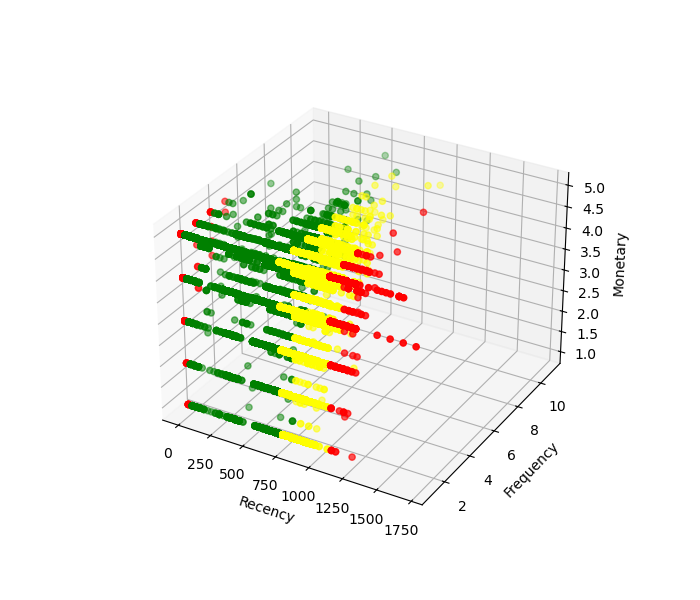

In [16]:
# Interactive 3D scatter plot of each customer's RFM values
%matplotlib widget

# Draw
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection = '3d')

# Decoration
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")

# Define color according to Recency (1 and 2:Green, 3:Yellow, 4:Red)
color = ['green' if x[0]<'3' else ('yellow' if x[0]=='3' else 'red') for x in X['RFMScore']]

# Plot
ax.scatter(X['Recency'], X['Frequency'], X['Monetary'], c=color)
plt.show()

Let's create a single graph consisting of three histograms, one for each RFM metric (recency, frequency, monetary). Each subplot is displayed side-by-side for easy comparison of metric distributions.

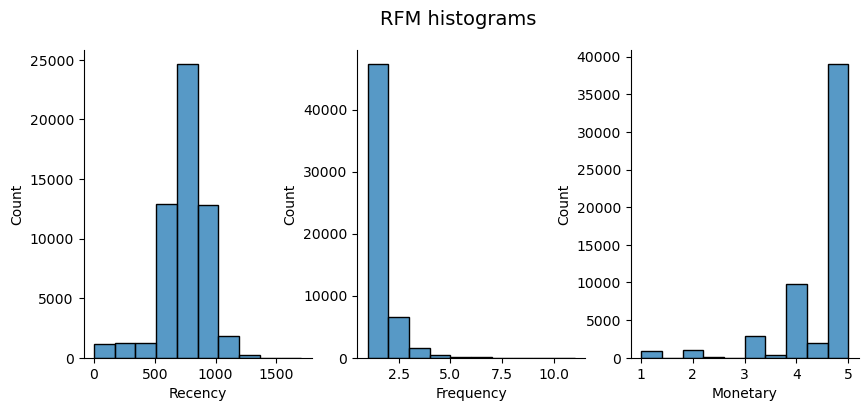

In [18]:
# Histogram of RFM
cols = ['Recency','Frequency','Monetary']

# Draw
fig, ax = plt.subplots(1, 3, figsize=(10,4))
for var, subplot in zip(X[cols], ax.flatten()):
    g = sns.histplot(data=X,
                bins=10,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("RFM histograms", fontsize=plots_Title_fontSize);

In [28]:
# Copy the remaining variables to the modeling dataset (in this case is only the country)
cols = ['User Name','Local ID']
X = X.merge(reviews_df[cols], how='left', left_index=True, right_on='User Name').drop(columns='User Name')

In [29]:
# Encode categorical variables to dummy variables
cols = ['Local ID' ]
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
X = ce_one_hot.fit_transform(X)

In [30]:
X_analysis = X.drop(columns=['RScore','FScore','MScore','RFMScore'])

The general purpose of these three codes in sequence was to prepare and preprocess data in X for more specific analysis. Let's create a dataframe containing variable averages for each RFM segment. Each row represents an RFM segment, and the columns represent the means of the variables for that segment.

In [31]:
# Check the mean values of each segment
segmentsMeanDF = pd.DataFrame(X_analysis.groupby(X['RFMScore'].values).mean())
segmentsMeanDF.transpose()

,111,112,113,114,121,122,123,124,133,134,...,444,nan11,nan12,nan13,nan14,nan23,nan24,nan33,nan34,nan44
Recency,238.000000,265.863636,250.748201,246.322478,365.0,250.833333,241.352941,240.203883,236.842105,225.850000,...,1174.714286,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000
Frequency,1.000000,1.000000,1.000000,1.000000,2.0,2.000000,2.000000,2.000000,3.000000,3.000000,...,5.476190,1.000000,1.0,1.0,1.000000,2.00,2.000000,3.0,3.000000,4.000
Monetary,1.457490,3.000000,4.000000,5.000000,1.5,2.958333,3.852941,4.820388,3.859649,4.750000,...,4.857143,1.388889,3.0,4.0,5.000000,3.75,4.928571,4.0,4.833333,4.875
Local ID_MAG008,0.024291,0.011364,0.007194,0.008940,0.0,0.000000,0.007353,0.014563,0.000000,0.016667,...,0.142857,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000
Local ID_MAG068,0.012146,0.000000,0.000000,0.001277,0.0,0.000000,0.000000,0.004854,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.012821,0.00,0.000000,0.0,0.000000,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Local ID_MAG042,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.007282,0.000000,0.008333,...,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000
Local ID_MAG096,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.002427,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000
Local ID_MAG073,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000
Local ID_MAG100,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000


1) The first DataFrame rows show the average recency for different RFM segments. Segments with lower recency values may be indicative of newer or more active customers.
2) The average frequency for each RFM segment is shown in the next rows. Segments with higher frequency values indicate that customers tend to interact or purchase more frequently.
3) The lines that follow show the average monetization for each of the RFM segments. Segments with higher monetized values indicate that customers tend to spend more.
4) The remaining columns represent categorical variables that are coded in a binary format. For example, "Local ID_MAG008" and "Local ID_MAG068" are categorical variables coded as 0s and 1s. This can indicate the presence or absence of certain categories in each RFM segment. For example, Local ID_MAG008 has a higher average value in some segments than in others, indicating that this category is more common in some segments than in others.

The means of these binary columns indicate the proportion of customers in each RFM segment who visited or interacted with the corresponding tourist attraction. Values close to 1 indicate that the majority of customers in that segment interacted with the attraction, while values close to 0 indicate that the majority did not.
You can analyze the averages of these columns to determine which attractions are most popular with different customer segments. This can help plan marketing strategies that target specific groups of customers based on their preferences for tourist attractions. Based on the results, you can customize offers, promotions, or recommendations based on tourist preferences. For example, if a segment has a high average for "Place ID_MAG008", you can create offers for that customer group based on that attraction.
You can use these metrics to evaluate the performance of each of your tourist attractions in relation to the different segments of your customer base. This can help identify how to improve or invest in specific attractions.

In [35]:
segmentsMeanDF.loc['144'].head(200)

Recency            225.730263
Frequency            4.907895
Monetary             4.730263
Local ID_MAG008      0.000000
Local ID_MAG068      0.000000
                      ...    
Local ID_MAG042      0.019737
Local ID_MAG096      0.000000
Local ID_MAG073      0.000000
Local ID_MAG100      0.000000
Local ID_MAG081      0.000000
Name: 144, Length: 102, dtype: float64

These averages provide a general portrait of the characteristics of the 144" segment. For example, this segment has a relatively low average recency, which could be an indication of newer or more active customers. In addition, the average frequency and the average monetization suggest a good level of engagement and spending by this segment.

In [36]:
# Select the columns of Portuguese tourist attractions.
variaveis_interesse = ['Local ID_MAG010', 'Local ID_MAG014', 'Local ID_MAG021', 'Local ID_MAG032', 'Local ID_MAG047', 'Local ID_MAG049', 'Local ID_MAG093']

# Calculating averages for RFM segment '144' in selected columns
medias_segmento_144 = segmentsMeanDF.loc['144'][variaveis_interesse]

# View calculated averages
print(medias_segmento_144)

Local ID_MAG010    0.000000
Local ID_MAG014    0.000000
Local ID_MAG021    0.019737
Local ID_MAG032    0.006579
Local ID_MAG047    0.000000
Local ID_MAG049    0.006579
Local ID_MAG093    0.000000
Name: 144, dtype: float64


The tourist attractions that showed a very low presence of customers in the "144" segment were as follows Ponte Dom Luís I, Park and National Palace of Pena, and Cais da Ribeira.
Attractions that have had some level of visitor presence, even if it is low, can be seen as opportunities. Even a small portion of the customers who visited these attractions may represent an interested audience. You can consider marketing strategies that target these attractions to increase engagement and drive more visits. 
It can be helpful to analyze the profiles of customers who have visited these attractions. There may be a common set of characteristics among the customers who have shown an interest in these attractions. This information can be used for audience segmentation and campaign targeting.
For attractions that have not had significant visitation, it is important to assess whether it is worth investing in new marketing strategies to increase their popularity. This will depend on the attraction potential of these tourist attractions, the goals of the government and the available budget.
Market research or customer surveys in the "144" segment can be an additional source of insight. You can find out why they don't visit certain attractions, and what kind of incentives or information would be the most persuasive. Instead of implementing new marketing strategies immediately, you can run smaller tests and experiments to evaluate impact before making larger decisions.
In summary, it is important to carefully consider the government's objectives, the characteristics of the public, and the feasibility of proposed strategies before making a decision. Customer engagement and understanding of their preferences are key to the development of effective strategies.

In [38]:
import datetime
print(datetime.datetime.now())

2023-12-31 18:41:10.205051
